Importing needed functions for lab:

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import sklearn.metrics as metrics

Getting the data to be used:

In [156]:
data = pd.read_excel('files_for_lab/excel_files/marketing_customer_analysis.xlsx', engine="openpyxl")

data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Sandarizing the Column names for better visualization:

In [157]:
cols = [] 
for col in data.columns: 
    cols.append(col.lower().replace(' ', '_')) 
data.columns = cols

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Getting the numerical data and storing it on a new Variable in order to set what is going to be used in order to predict the desired column:

In [158]:
data_num = data._get_numeric_data()
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Droping duplicates to have a better overview

In [159]:
data_num = data_num.drop_duplicates()

Checking the numerical data shape in order to compare the amount of rows that were dropped:

In [160]:
data.shape

(9134, 24)

In [161]:
data_num.shape

(8044, 8)

1090 rows dropped and 16 rows are categorical on our starting data 

Checking the content for NaN on our numerical data:

In [162]:
data_num.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

Creating a correlation Matrix to check study which columns to drop in order to have a better prediction:

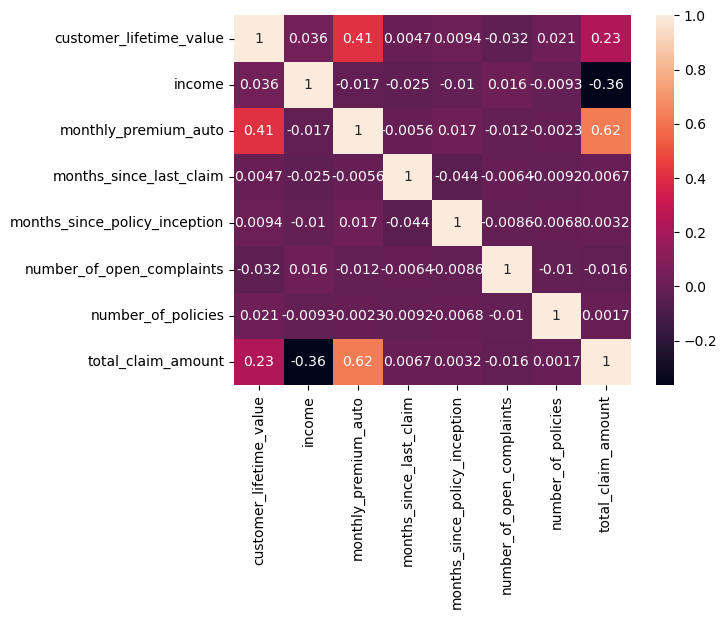

In [163]:
correlations_matrix = data_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

The correlations founded were not extremely high, therefore no dropping needed. But in this case since this module was already tested twice before for efects of comparison i will drop the highest correlation to the desired prediction column value that is monthly_premium_auto:

In [164]:
data_num = data_num.drop(['monthly_premium_auto'] , axis=1)

Dropping the desired column to get ready from the transformation:

In [165]:
X = data_num.drop(['total_claim_amount'],axis=1)
y = data_num['total_claim_amount']

Applying the power transformation:

In [166]:
pt = PowerTransformer().fit(X)
x_standardized = pt.transform(X)
X_scaled_df = pd.DataFrame(x_standardized, columns=X.columns)
X_scaled_df.head()

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-1.398733,0.697367,1.456566,-1.716170,-0.513067,-1.154955
1,0.270388,-1.595319,-0.045747,-0.107896,-0.513067,1.576983
2,1.113386,0.608685,0.409710,-0.250077,-0.513067,-0.075615
3,0.407401,-1.595319,0.409710,0.645134,-0.513067,1.460713
4,-1.360930,0.544764,-0.145138,-0.038296,-0.513067,-1.154955


Spliting the data in order to have a test group to check the errors compared:

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=12)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6435, 6)
(1609, 6)
(6435,)
(1609,)


Applying the linear regression:

In [168]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

After splitting the data and applying the regression, let's check the errors:

R2 score:

In [169]:
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

0.23629712819790316

In [170]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

0.2407785015601669

RMSE:

In [171]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

256.23486858432324

In [172]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

269.1568992876555

MEA:

In [173]:
maetrain = metrics.mean_absolute_error(y_train, y_pred_train)
print (maetrain)

185.23448423484083


In [174]:
maetest = metrics.mean_absolute_error(y_test, y_pred_test)
print (maetest)

190.44160586331336


MSE:

In [175]:
msetrain = metrics.mean_squared_error(y_train, y_pred_train)
print (msetrain)

65656.30787842539


In [176]:
msetest = metrics.mean_squared_error(y_test, y_pred_test)
print (msetest)

72445.43643414513


The differences between the errors were not wild. As a conclusion, since this data base is not one easy to predict (at least with the transformations and regressions precentes till now). We might wonder if using a non linear regression would be the a possibility or find a way of having more data, such as using the non categorical data after a transformation to fit the regression.